In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [14]:
data_dir='/content/drive/MyDrive/Data'
categories=os.listdir(data_dir)

images=[]
labels=[]

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)
      img=cv2.imread(img_path)
      if img is not None:
        img = cv2.resize(img, (64, 64))
        images.append(img)
        labels.append(category)

images=np.array(images)

Tomato___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Early_blight
Tomato___Bacterial_spot


In [15]:
x=np.array(images)
y=np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)

Labels: ['Tomato___Early_blight' 'Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']
Data Shape: (11000, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1981
Tomato___healthy                          1926
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1790
Tomato___Early_blight                     1625
Name: count, dtype: int64


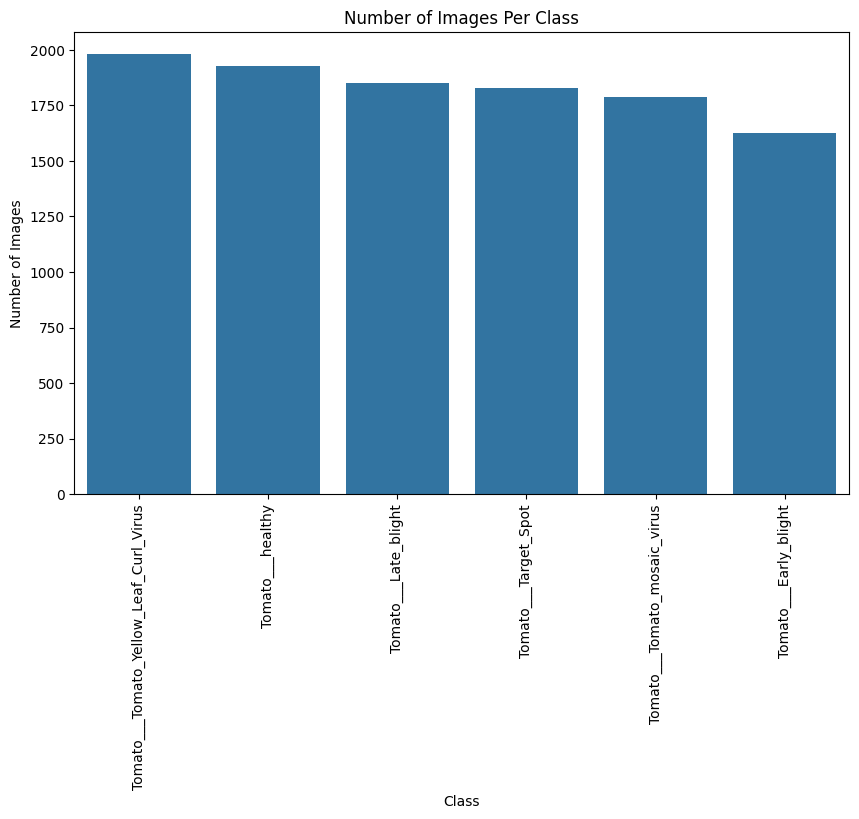

In [16]:
class_counts=pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

# plot class distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images Per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [17]:
valid_images=[]
valid_labels=[]

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)

print("Cleared Data Shape:",x.shape)

Cleared Data Shape: (11000, 64, 64, 3)


In [19]:
#Encode Labels

le=LabelEncoder()
y_encoded=le.fit_transform(y)


# save class names for later use

class_names=le.classes_
class_names

array(['Tomato___Early_blight', 'Tomato___Late_blight',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

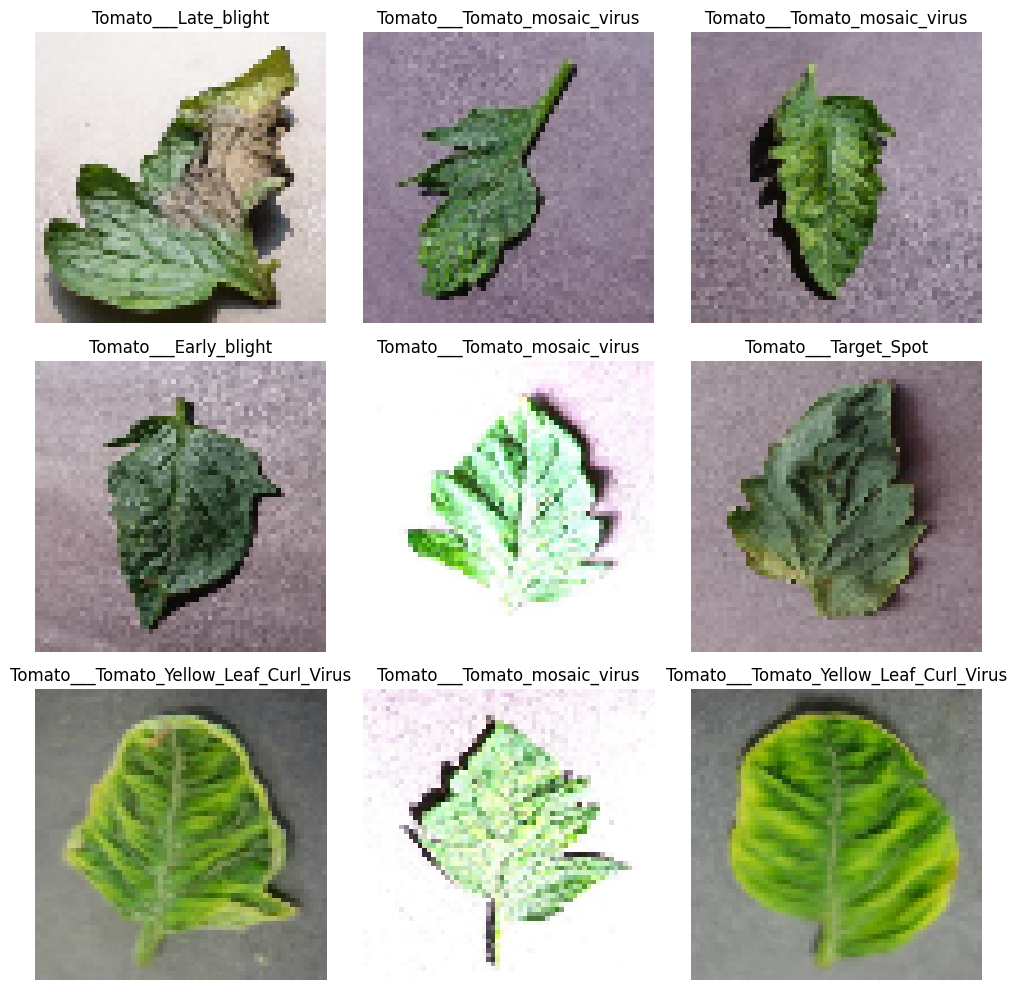

In [20]:
import random
plt.figure(figsize=(10,10))
for i in range(9):
  idx=random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
def extract_color_histogram(image, bins=(8,8,8)):

  images = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([images], [0,1,2], None, bins, [0,256,0,256,0,256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [22]:
x_features.shape

(11000, 512)

In [28]:
model = SVC(kernel='rbf',C=10, gamma='scale')

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

Accuracy: 0.9818181818181818
F1 Score: 0.9817577227258113


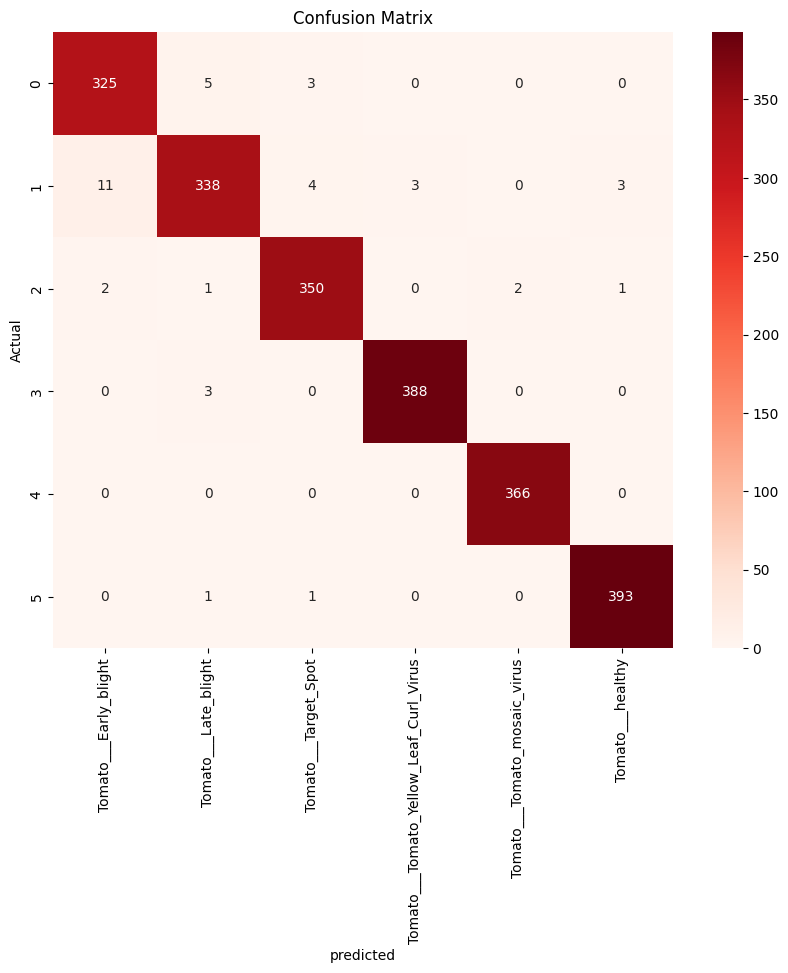

In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds',xticklabels=class_names)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                                        precision    recall  f1-score   support

                 Tomato___Early_blight       0.96      0.98      0.97       333
                  Tomato___Late_blight       0.97      0.94      0.96       359
                  Tomato___Target_Spot       0.98      0.98      0.98       356
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       391
          Tomato___Tomato_mosaic_virus       0.99      1.00      1.00       366
                      Tomato___healthy       0.99      0.99      0.99       395

                              accuracy                           0.98      2200
                             macro avg       0.98      0.98      0.98      2200
                          weighted avg       0.98      0.98      0.98      2200

